<a href="https://colab.research.google.com/github/mlengineer666/CODSOFT-/blob/main/SMS_spam_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Optimization
# 7. Create web and deploy via heroku

In [5]:
import numpy as np
import pandas as pd

try:
  sms_spam = pd.read_csv('/content/spam.csv',encoding='Latin-1')
except:
  sms_spam = pd.read_csv('/content/spam.csv')

# To check number of columns and rows
sms_spam.sample(3)
sms_spam.shape

# Describe
sms_spam.describe()

# check info
sms_spam.info()  # ----> Unnamed 2,3,4 are containing null value , so remove it first

# remove null columns
sms_spam.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

sms_spam.sample(3)




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


,v1,v2
2537,ham,That's y we haf to combine n c how lor...
1401,ham,Kaiez... Enjoy ur tuition... Gee... Thk e seco...
2495,spam,WINNER! As a valued network customer you hvae ...


In [6]:
# Now rename the v1 and v2 columns

sms_spam.rename(columns={'v1':'target','v2':'text'},inplace=True)
sms_spam.sample(5)



,target,text
3411,ham,No she didnt. I will search online and let you...
1539,ham,You're not sure that I'm not trying to make xa...
2788,ham,ÌÏ got wat to buy tell us then Ì_ no need to c...
2274,ham,Think I could stop by in like an hour or so? M...
3149,ham,Yo! Howz u? girls never rang after india. L


In [7]:
# Now target column contain 2 types of data [ham,spam]

# convert this ham and spam into 0 and 1 for mathematical expression

sms_spam.target.value_counts()

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

sms_spam['target'] = le.fit_transform(sms_spam['target'])
sms_spam.sample(5)


,target,text
4606,0,Been running but only managed 5 minutes and th...
159,1,You are a winner U have been specially selecte...
972,0,Yup i thk so until e shop closes lor.
216,0,Tired. I haven't slept well the past few nights.
709,1,4mths half price Orange line rental & latest c...


In [8]:
# Missing values

sms_spam.isnull().sum()

# Duplicates_values

sms_spam.duplicated().sum()

sms_spam.drop_duplicates(keep='first',inplace=True)
sms_spam.duplicated().sum()

sms_spam.shape


(5169, 2)

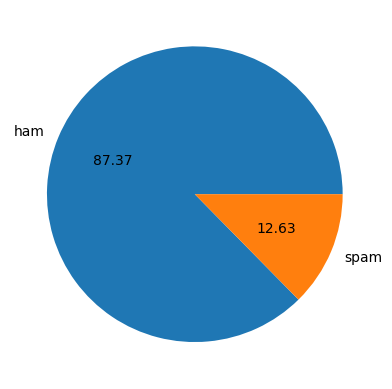

In [9]:
# Performing EDA on dataset

# check number of spam and number of ham

sms_spam['target'].value_counts() # ---> number of ham and spam

# ''' sms_spam[sms_spam['target']==1].shape[0]  # ---> spam '''

import matplotlib.pyplot as plt

plt.pie(sms_spam['target'].value_counts(),labels=['ham','spam'],autopct='%.2f')
plt.show() # ---> so from pie diagram we can clearly see data is imbalanced





In [10]:
import nltk

nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [11]:
sms_spam['characters'] = sms_spam['text'].apply(lambda x:len(x))
sms_spam.head()

sms_spam['word'] = sms_spam['text'].apply(lambda x:len(nltk.word_tokenize(x)))
sms_spam.head()

sms_spam['sentence'] = sms_spam['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
sms_spam.head()




,target,text,characters,word,sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [12]:
sms_spam[['characters','word','sentence']].describe()

#  describe for ham message
sms_spam[sms_spam['target'] == 0][['characters','word','sentence']].describe()



,characters,word,sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [13]:
#  describe for spam message

sms_spam[sms_spam['target']==1][['characters','word','sentence']].describe()


,characters,word,sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='characters', ylabel='Count'>

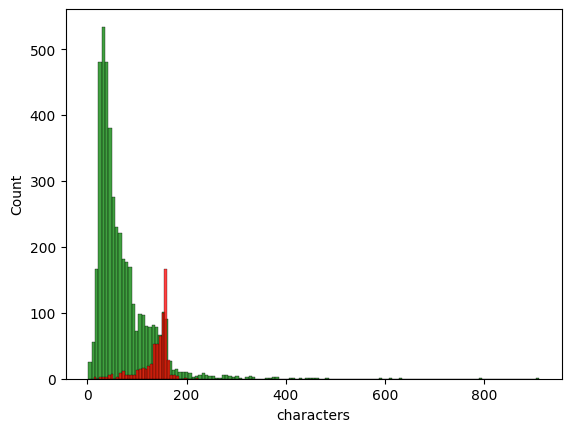

In [14]:
# histogram plot for ham and spam characters

import seaborn as sns

sns.histplot(sms_spam[sms_spam['target']==0]['characters'],color='green')

sns.histplot(sms_spam[sms_spam['target']==1]['characters'],color='red')



<Axes: xlabel='word', ylabel='Count'>

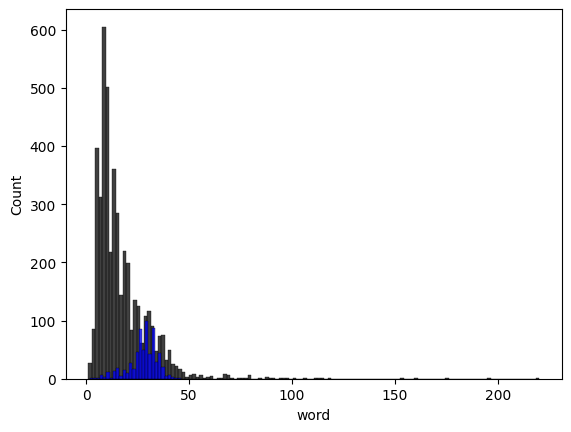

In [15]:
# histogram plot for ham and spam word


sns.histplot(sms_spam[sms_spam['target']==0]['word'],color='black')

sns.histplot(sms_spam[sms_spam['target']==1]['word'],color='blue')


<Axes: xlabel='sentence', ylabel='Count'>

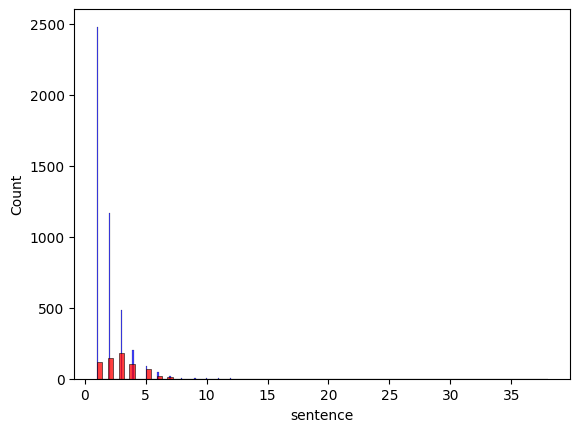

In [16]:
# histogram plot for ham and spam sentence

sns.histplot(sms_spam[sms_spam['target']==0]['sentence'],color='blue')

sns.histplot(sms_spam[sms_spam['target']==1]['sentence'],color='red')


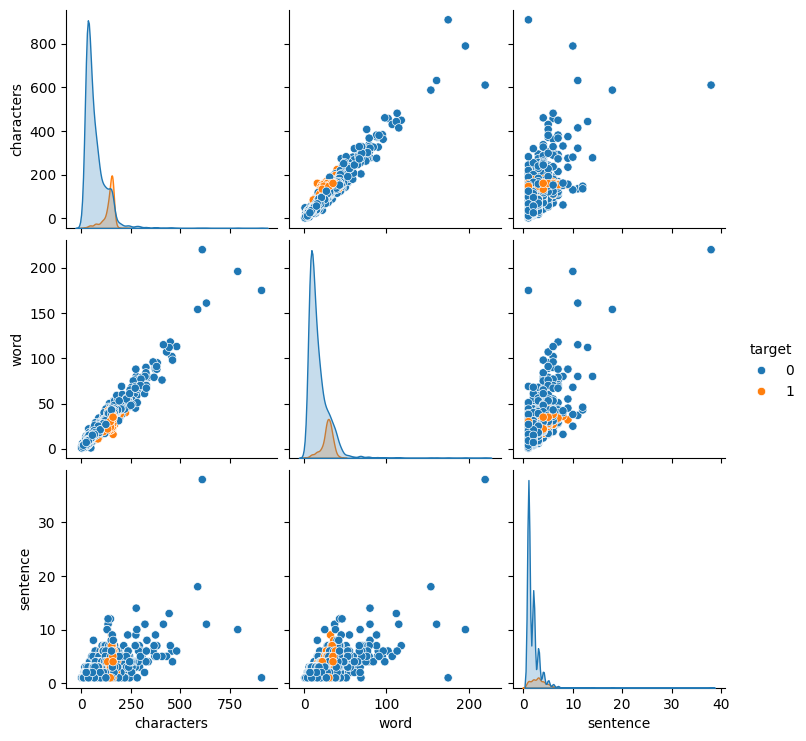

In [17]:
# relation b/w characters , word , sentence according to the target

sns.pairplot(sms_spam[['characters','word','sentence','target']],hue='target')



<Axes: >

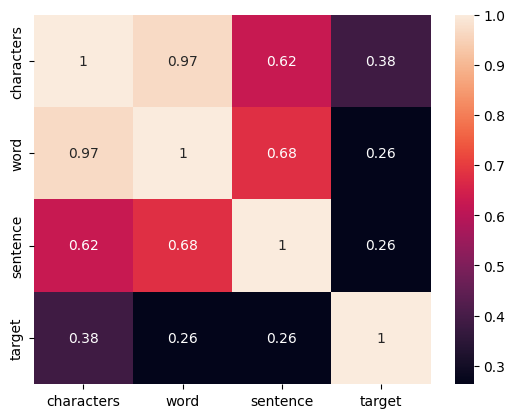

In [18]:

sns.heatmap(sms_spam[['characters','word','sentence','target']].corr(),annot=True)
# so we can see we have multicolinearity in our data ,that's why we can choose one column


In [19]:
def preprocess(text):
  # convert into lower
  text = text.lower()

  # tokenization
  text = nltk.word_tokenize(text)

  # remove special character
  x = []
  for i in text:
    if i.isalnum():
      x.append(i)

  # remove stopwords
  text = x[:]
  x.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      x.append(i)

  # Stemming
  text = x[:]
  x.clear()

  for i in text:
    x.append(ps.stem(i))

  return ' '.join(x)

In [24]:
print(preprocess('hi HOw! are u sandi did you like my project?'))


print(preprocess('I am gonna be home soon and i do not want to talk about this stuff anymore tonight, k? I have cried enough today'))


hi u sandi like project
gon na home soon want talk stuff anymor tonight k cri enough today


In [21]:
# to check syopwords

from nltk.corpus import stopwords
nltk.download('stopwords')

stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [22]:
# to check punctuation
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [23]:
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()
ps.stem('playing')
ps.stem('dancing')



'danc'

# **New column for text_transformation**

In [25]:
#  so now we can apply transform function on text series

sms_spam['transform_text'] = sms_spam['text'].apply(preprocess)


In [26]:
sms_spam.sample(5)


,target,text,characters,word,sentence,transform_text
5202,0,WOT STUDENT DISCOUNT CAN U GET ON BOOKS?,40,9,1,wot student discount u get book
389,0,Yup having my lunch buffet now.. U eat already?,47,11,1,yup lunch buffet u eat alreadi
73,0,K..k:)where are you?how did you performed?,42,14,1,k k perform
3083,0,Ok lor. I ned 2 go toa payoh 4 a while 2 retur...,82,24,2,ok lor ned 2 go toa payoh 4 2 return smth u wa...
5187,0,WHAT TIME U WRKIN?,18,5,1,time u wrkin


**Word_cloud of ham and spam messages**

In [27]:
from wordcloud import WordCloud

wc = WordCloud(width=500,height=500,min_font_size=15,background_color='white')


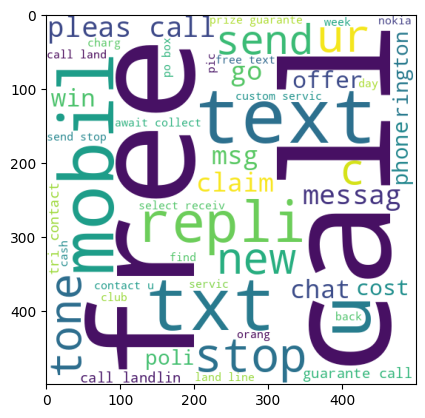

In [28]:
# take the spam and extract the associative transform_text

spam_wc = wc.generate(sms_spam[sms_spam['target']==1]['transform_text'].str.cat(sep=''))

plt.imshow(spam_wc)

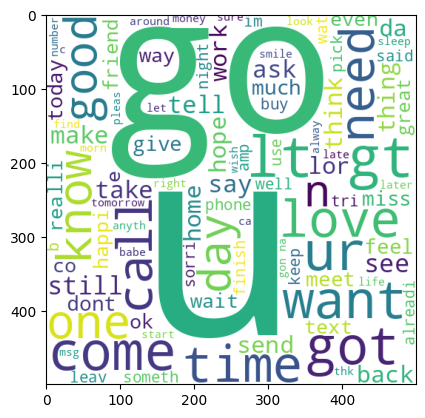

In [29]:
# take the ham and extract the associative transform_text

ham_wc = wc.generate(sms_spam[sms_spam['target']==0]['transform_text'].str.cat(sep=''))

plt.imshow(ham_wc)

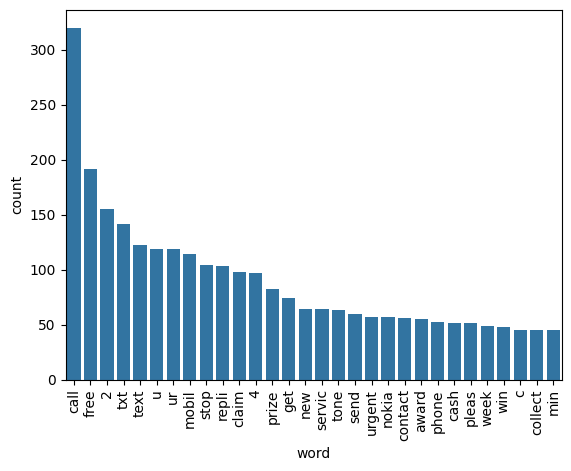

In [30]:
# top 10 words from spam

spam_folder = []

for msg in sms_spam[sms_spam['target']==1]['transform_text'].tolist():
  for word in msg.split():
    spam_folder.append(word)

from collections import Counter

spam_word_counts = pd.DataFrame(Counter(spam_folder).most_common(30), columns=['word', 'count'])

sns.barplot(x='word', y='count', data=spam_word_counts)
plt.xticks(rotation='vertical')
plt.show()



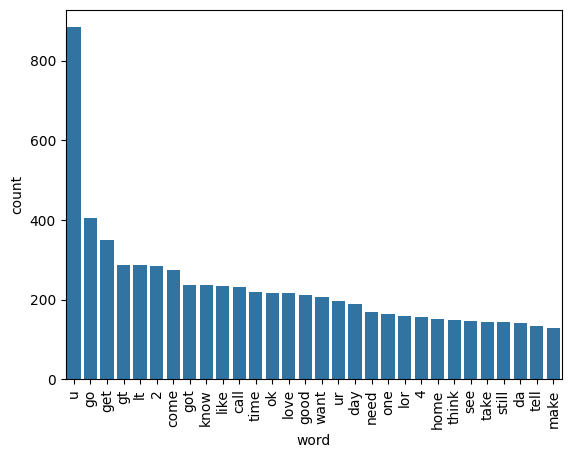

In [31]:
# for ham

ham_folder = []

for msg in sms_spam[sms_spam['target']==0]['transform_text'].tolist():
  for word in msg.split():
    ham_folder.append(word)

from collections import Counter

ham_word_counts = pd.DataFrame(Counter(ham_folder).most_common(30), columns=['word', 'count'])

sns.barplot(x='word', y='count', data=ham_word_counts)
plt.xticks(rotation='vertical')
plt.show()

**Model Evaluation --->  Naive Bayes**

Why Naive Bayes ?
  >> This model fit on Textual data

  Here we use countvectorizer

In [32]:
# for model evaluate we need numerical type data , but we have just target column so we need to convert transformation_text column into vector

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()

arr1 = cv.fit_transform(sms_spam['transform_text']).toarray()
arr1.shape



(5169, 6708)

In [33]:
# now extract target column
arr2 = sms_spam['target'].values
arr2

array([0, 0, 1, ..., 0, 0, 0])

In [34]:
#  Now we have arra1 and array2 so apply train_test_split

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(arr1,arr2,test_size = 0.2,random_state=12)




In [35]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score


In [36]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [37]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))


0.8655705996131529
[[785 123]
 [ 16 110]]
0.4721030042918455


In [38]:
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9748549323017408
[[890  18]
 [  8 118]]
0.8676470588235294


In [40]:
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))


0.9748549323017408
[[907   1]
 [ 25 101]]
0.9901960784313726


# **Conclusion: from countvectorizer bnb is working perfectly with high precison sscore and high accuracy**

Now we will use tfidfvectorizer

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()

In [42]:
x1 = tf.fit_transform(sms_spam['transform_text']).toarray()
print(x1.shape)
x1

(5169, 6708)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [43]:
y1 = sms_spam['target'].values
y1

array([0, 0, 1, ..., 0, 0, 0])

In [44]:
x1_train,x1_test,y_train,y_test = train_test_split(x1,y1,test_size=0.2,random_state=12)

In [45]:
bnb.fit(x1_train,y_train)
y1_pred1 = bnb.predict(x1_test)
print(accuracy_score(y_test,y1_pred1))
print(confusion_matrix(y_test,y1_pred1))
print(precision_score(y_test,y1_pred1))

0.9748549323017408
[[907   1]
 [ 25 101]]
0.9901960784313726


In [46]:
mnb.fit(x1_train,y_train)
y1_pred1 = mnb.predict(x1_test)
print(accuracy_score(y_test,y1_pred1))
print(confusion_matrix(y_test,y1_pred1))
print(precision_score(y_test,y1_pred1))

0.9680851063829787
[[908   0]
 [ 33  93]]
1.0


In [47]:
bnb.fit(x1_train,y_train)
y1_pred1 = bnb.predict(x1_test)
print(accuracy_score(y_test,y1_pred1))
print(confusion_matrix(y_test,y1_pred1))
print(precision_score(y_test,y1_pred1))

0.9748549323017408
[[907   1]
 [ 25 101]]
0.9901960784313726


Conclusion : for using tfidfvectirize method multinomialvectirizer perform very well on precision scorer

# **Now check other machine learning model to compare with this model**

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


In [103]:
# ---> Create the objects of each model

lr = LogisticRegression(solver='liblinear',penalty='l1')
sv = SVC(kernel='sigmoid',gamma=1.0)
mb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
knc = KNeighborsClassifier()
rfc = RandomForestClassifier(n_estimators=50,random_state=2)
abc = AdaBoostClassifier(n_estimators=50,random_state=2)
bc = BaggingClassifier(n_estimators=50,random_state=2)
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)


In [104]:
# dictionary to store all models
model_dict = {
    'SVC':sv,
    'LR':lr,
    'DT':dtc,
    'KNC':knc,
    'MNB':mb,
    'RFC':rfc,
    'ABC':abc,
    'BC':bc,
    'ETC':etc,
    'GBDT':gbdt,
    'XGB':xgb
}

In [105]:
def train_classifier(model_dict,x_train,y_train,x_test,y_test):
  model_dict.fit(x_train,y_train)
  y_pred = model_dict.predict(x_test)
  accuracy = accuracy_score(y_test,y_pred)
  precision = precision_score(y_test,y_pred)
  return accuracy,precision


In [106]:
#  For e.g:
train_classifier(sv,x1_train,y_train,x1_test,y_test)

(0.9806576402321083, 0.9818181818181818)

In [107]:
accuracy_scores = []
precision_scores = []

for name,model in model_dict.items():
  curr_accuracy,curr_precision = train_classifier(model,x1_train,y_train,x1_test,y_test)
  accuracy_scores.append(curr_accuracy)
  precision_scores.append(curr_precision)

,Algorithm,Accuracy,Precision
5,RFC,0.973888,1.000000
4,MNB,0.968085,1.000000
3,KNC,0.907157,1.000000
8,ETC,0.977756,1.000000
0,SVC,0.980658,0.981818
1,LR,0.961315,0.938776
10,XGB,0.967118,0.918182
9,GBDT,0.950677,0.894737
7,BC,0.958414,0.842975
2,DT,0.934236,0.802083


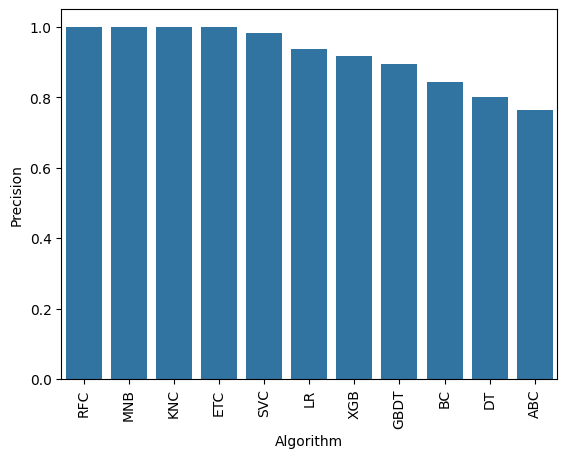

In [90]:
model_dataframe = pd.DataFrame({'Algorithm':model_dict.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
display(model_dataframe)

sns.barplot(x='Algorithm',y='Precision',data=model_dataframe)
plt.xticks(rotation='vertical')
plt.show()